**NOTEBOOK DE GROUPE : Tran Khoi DANG, Kim Thang VO, Truong Minh TUE, Trung Thai DO**  
**DANS LE CADRE DU PROJET D'ANALYSE DE DONNÉES EN 4eme ANNÉE GMM INSA TOULOUSE (ANNÉE 2022-2023).**

# 1. INTRODUCTION 
**Description and aim.**  
The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent. From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. **This clustering should then be used to predict the loading profile.**

**Guidelines**
- Descriptive statistics.
- PCA to reduce dimension (originally > 150).
- Clustering on original data, on PCA coordinates. Other ideas : kernel PCA, coefficients of a suitable functional basis...
- Interpretation, comparison.

Timing. Start: February 4. End: May 17  
Organisation: By groups of 4.  
Deliverables: 2 notebooks, one in R, and its transcription in Python + 1 pdf report.   
The report is limited to 15 pages, including figures, and must not contain any code.   
It must contain an introduction, a conclusion, a synthesis for each section explaining the main conclusions.These synthesis & the conclusion summarize the main facts for somebody who do not want to read the details.  
Furthermore, all the results provided must be interpreted.



## 1.1. Data

The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent. From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). 

## 1.2. Objectif

The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

# 2. Exploration descriptive des données

## 2.1. Necessary libraries installation & importation

In [ ]:
#libraries import
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## 2.2. Reading data

In [ ]:
# direct loading from data files
# need to upload files needed
loading_df = pd.read_csv('velibLoading.csv', sep = " ")
loading_df.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1     0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2     0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3     0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4     0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5     0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   
...        ...       ...       ...       ...       ...       ...       ...   
1185  0.000000  0.000000  0.000000  0.000000  0.000000  0.045455  0.000000   
1186  0.200000  0.133333  0.155556  0.177778  0.177778  0.177778  0.200000   
1187  0.551724  0.517241  0.551724  0.517241  0.517241  0.551724  0.551724   
1188  0.476190  0.428571  0.428571  0.428571  0.428571  0.428571  0.476190   
1189  0.937500  0.968750  0.906250  0.875000  0.906250  0.906250  0.937500   

        Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16  \
1     0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111   
2     0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391   
3     0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704   
4     1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762   
5     0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909   
...        ...       ...       ...  ...       ...       ...       ...   
1185  0.090909  0.136364  0.000000  ...  0.043478  0.173913  0.043478   
1186  0.177778  0.288889  0.511111  ...  0.266667  0.288889  0.155556   
1187  0.448276  0.241379  0.034483  ...  0.482759  0.310345  0.000000   
1188  0.523810  0.428571  0.476190  ...  0.880000  0.760000  0.750000   
1189  0.937500  0.968750  1.000000  ...  1.000000  1.000000  0.687500   

        Dim-17    Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1     0.148148  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2     0.130435  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3     0.129630  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4     0.857143  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5     0.833333  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  
...        ...       ...       ...       ...       ...       ...       ...  
1185  0.086957  0.086957  0.304348  0.304348  0.130435  0.086957  0.086957  
1186  0.222222  0.333333  0.311111  0.355556  0.377778  0.333333  0.355556  
1187  0.000000  0.103448  0.379310  0.310345  0.310345  0.344828  0.482759  
1188  0.958333  1.000000  0.791667  0.791667  0.500000  0.434783  0.478261  
1189  0.550000  0.950000  0.444444  0.526316  0.894737  0.947368  0.833333  

[1189 rows x 168 columns]

In [ ]:
loading_df.describe()

Lun-00       Lun-01       Lun-02       Lun-03       Lun-04  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.401503     0.408770     0.411718     0.415161     0.417136   
std       0.337079     0.335566     0.336132     0.337158     0.332237   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.093750     0.093023     0.096774     0.100000     0.108696   
50%       0.312500     0.333333     0.342857     0.350000     0.357143   
75%       0.694444     0.705882     0.708333     0.710526     0.700000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Lun-05       Lun-06       Lun-07       Lun-08       Lun-09  ...  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  ...   
mean      0.421650     0.419860     0.415729     0.384658     0.326331  ...   
std       0.326644     0.323422     0.319302     0.303621     0.314026  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.114286     0.114286     0.117647     0.114286     0.047619  ...   
50%       0.363636     0.360000     0.360000     0.320000     0.215385  ...   
75%       0.700000     0.700000     0.687500     0.636364     0.575000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

            Dim-14       Dim-15       Dim-16       Dim-17       Dim-18  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.346147     0.325526     0.311334     0.306399     0.314730   
std       0.340516     0.339897     0.336863     0.331194     0.322904   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.051282     0.041667     0.038462     0.043478     0.052632   
50%       0.204082     0.166667     0.151515     0.142857     0.172414   
75%       0.651163     0.608696     0.555556     0.550000     0.550000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Dim-19       Dim-20       Dim-21       Dim-22       Dim-23  
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  
mean      0.334080     0.353493     0.385975     0.392552     0.397529  
std       0.317279     0.317572     0.328448     0.335061     0.341536  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.071429     0.080000     0.095238     0.086957     0.090909  
50%       0.200000     0.238095     0.285714     0.292683     0.292683  
75%       0.558140     0.600000     0.666667     0.666667     0.692308  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 168 columns]

In [ ]:
velibAdds = pd.read_csv('velibAdds.csv', sep = " ")
velibAdds.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

## 2.3. Data cleaning

In [ ]:
#search for duplicated names of stations : suggest to rename duplicated names (same name but different geographic position!)
velibAdds["names"][np.where(velibAdds.duplicated(subset="names") == True)[0]+1] 
#+1 because index row from 1

210                 BELLEVILLE
345         PARC DE BELLEVILLE
361                 PORT ROYAL
395                   BROCHANT
450            PORTE DES LILAS
493               CHERCHE MIDI
500                     CLICHY
535            ALEXANDRE DUMAS
546                    AQUEDUC
676          GARE D'AUSTERLITZ
693                       DODU
702          GARE D'AUSTERLITZ
785                   LEGENDRE
830             SAINT AUGUSTIN
864      FAURE (AUBERVILLIERS)
886          BOURSE DU TRAVAIL
957            PORTE DES LILAS
980          PORTE DE BAGNOLET
1018        WILSON (LEVALLOIS)
1047             GARE DE L'EST
1056                  LACEPEDE
1085                  BASTILLE
1091                  JOURDAIN
1104       PORTE DE SAINT OUEN
1111        FRANCE (LEVALLOIS)
1113            RICHARD LENOIR
1180              SAINT MARCEL
1182              SAINT HONORE
Name: names, dtype: object

In [ ]:
#duplicated names of stations have different location coordinates so we decide to rename duplicated stations by adding prefix DUP1,2,3
nth = ['', 'DUP1 ', 'DUP2 ']
def prefix(d):
    n = len(d)
    if n > 1:
        return d.radd([nth[i] for i in range(n)])
    else:
        return d
velibAdds = velibAdds.assign(names=velibAdds.groupby('names').names.transform(prefix))

In [ ]:
#recheck the duplicated names of stations
velibAdds["names"][np.where(velibAdds.duplicated(subset="names") == True)[0]+1] #+1 because index row from 1

Series([], Name: names, dtype: object)

In [ ]:
#check missing values
loading_df.isnull().sum().sum() #0

0

## 2.4. Data visualization

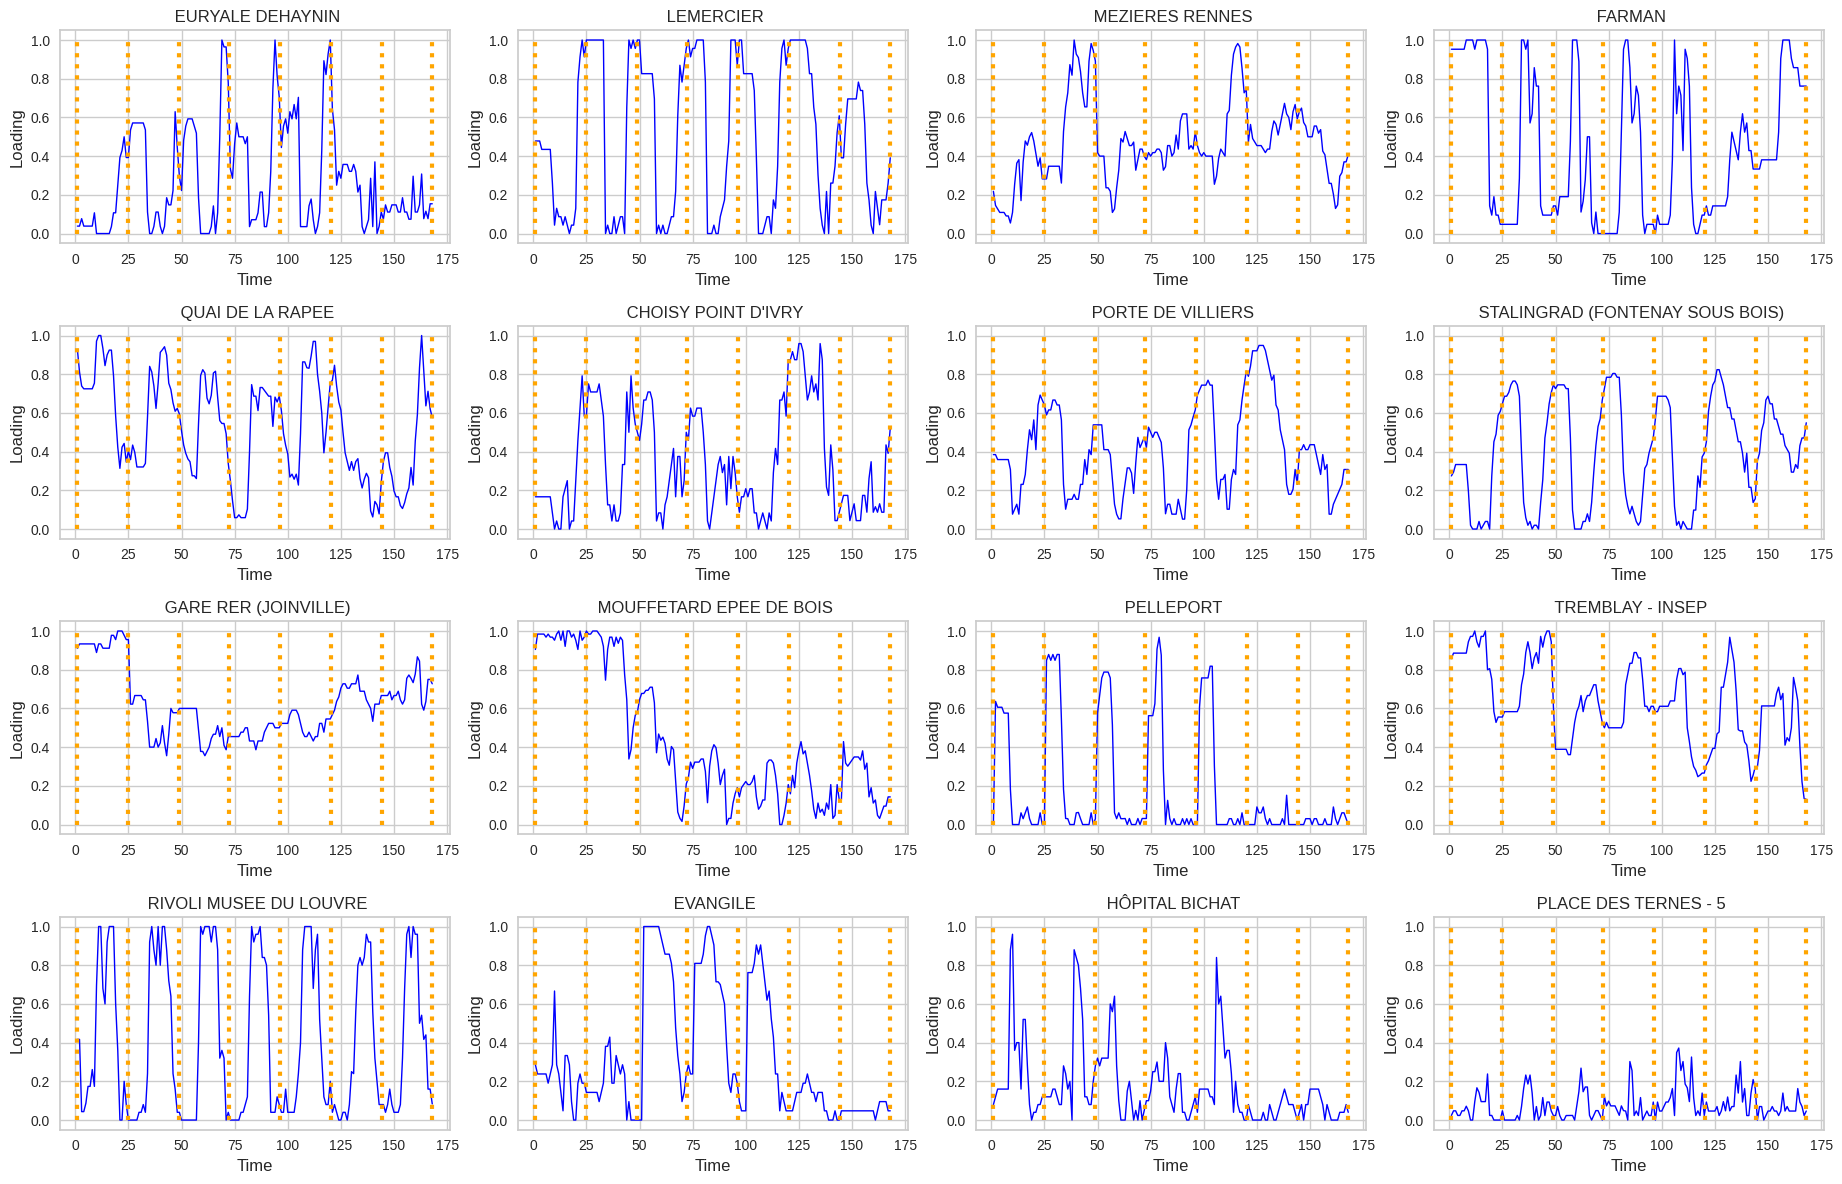

In [ ]:
#plot loading score in the period observed of the first 16 stations in the dataset
loading_matrix = loading_df.to_numpy()
n_steps = loading_df.shape[1]
time    = np.linspace(1, n_steps, n_steps)

fig, axs = plt.subplots(4, 4, figsize = (18.5,12))
for i in range(4):
    for j in range(4):
        k_station = 4 * i + j
        axs[i, j].plot(time, loading_matrix[k_station, :], linewidth = 1, color = 'blue')
        axs[i, j].set_title(velibAdds.names[1 + k_station], fontsize = 12)
        axs[i, j].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Zoomed boxplot of 24 variables of Monday')

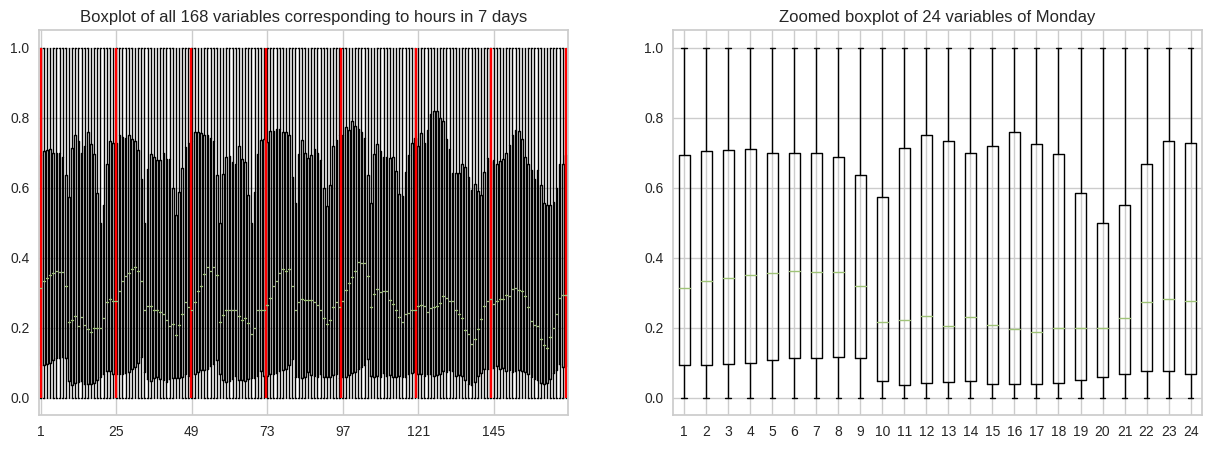

In [ ]:
# Boxplot of all 168 variables (loading score for each hour in 7 days) (left graph)
# Boxplot of 24 first variables (loading score of 24 hours of Monday) (right graph) 
fig, axs = plt.subplots(1, 2, figsize = (15,5))

axs[0].boxplot(loading_df)
axs[0].set_xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
axs[0].vlines(x = np.linspace(1, loading_df.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
axs[0].set_title("Boxplot of all 168 variables corresponding to hours in 7 days")

axs[1].boxplot(loading_df.iloc[:, :24])
axs[1].set_title("Zoomed boxplot of 24 variables of Monday")


**Interpretation of boxplot**

Distribution : 
- position :  median of all variables are around 0.3
- dispersion : intervalle inter-quartile -> in general constant, range from 0.05 to 0.7, lower dispersion in hours where people rent more (late afternoon)
- symmetry : no symetry(or gaussian), median closer to lowerquantile -> Positively Skewed, mean > median, data constitued of more higher score, less people rent (all compared to median)
- no outliers, we take all values from 0 to 1.
- difference in day : no difference remarkable, on saturday sunday people tends to rent more at early morning
- difference in hours : early morning and late night people doesn't rent bike


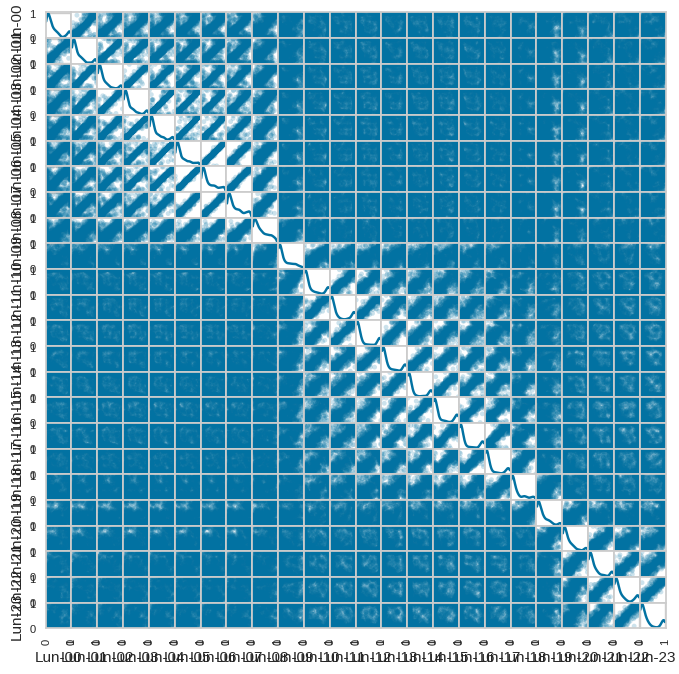

In [ ]:
#corrplot 24 first variables correponding to 24 hours of monday  
from pandas.plotting import scatter_matrix
scatter_matrix(loading_df.iloc[:, :24],  alpha=0.2, 
               figsize=(8, 8), diagonal='kde')
plt.show()

**Interpretation de corrplot**  
En général, on voit que les loading scores entre différentes heures sont corrélées positivement. On voit les groupes de fortes corrélation (les loading scores du matin, de l'après midi et du soir).


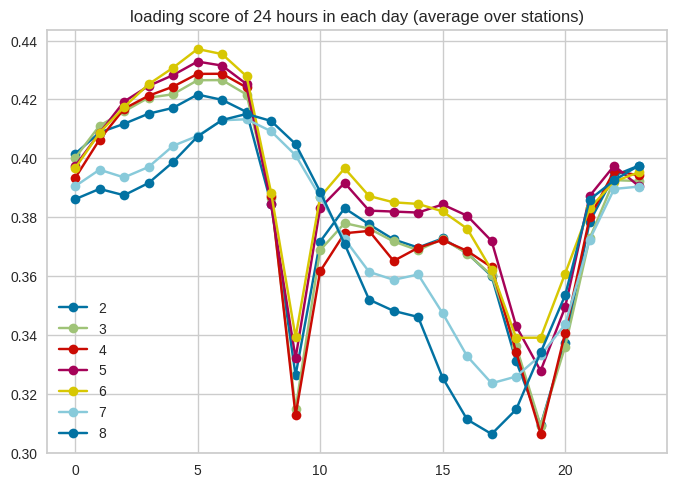

In [ ]:
#plot average loading score per hour of 7 days

plt.plot(np.array(loading_df.mean()).reshape((7,24)).T, 'o-')
plt.title("loading score of 24 hours in each day (average over stations)")
plt.legend(range(2,9))
plt.show()

**Interpretation**
- five days of the week, Monday to Friday, average behavior the same
- Saturday and Sunday, average behavior different than in week-day (maybe people wake up later in the morning)

In [ ]:
#mean loading score of all stations by each hour in the period  of 7 days
load = np.array(loading_df.mean(axis=1))

#mean loading score of all stations from repectively 6h, 12h, 23h of 7 days
load6 =np.array(loading_df.iloc[:, np.arange(6, 168+6, 24)].mean(axis=1))
load12=np.array(loading_df.iloc[:, np.arange(12, 168+12, 24)].mean(axis=1))
load23=np.array(loading_df.iloc[:, np.arange(23, 168+23, 24)].mean(axis=1))

velibAdds['load'] = load
velibAdds['load6'] = load6
velibAdds['load12'] = load12
velibAdds['load23'] = load23

In [ ]:
#interactive map for mean loading score over the period of 7days
import folium
import pandas as pd
import folium.plugins

import branca
import branca.colormap as cm

#follium
data_df = velibAdds[['latitude', 'longitude', 'load']]
data = data_df.values.tolist()
df = pd.DataFrame(data, columns=['latitude','longitude','load'])

x_start = (df['latitude'].max() + df['latitude'].min()) / 2
y_start = (df['longitude'].max() + df['longitude'].min()) / 2
start_coord = (x_start, y_start)

colormap = cm.LinearColormap(colors=['blue', 'yellow'])
map = folium.Map(location=start_coord, zoom_start=12)
lat = list(df.latitude)
lon = list(df.longitude)
pow = list(df.load)

for loc, p in zip(zip(lat, lon), pow):
    folium.Circle(
        location=loc,
        radius=10,
        fill=True,
        color=colormap(p),
        fill_opacity=0.5
    ).add_to(map)

map.add_child(colormap)

display(map)

## 2.5. Additional hill info

In [ ]:
loading_hill = loading_df[velibAdds.bonus==1]
velibAdds_hill = velibAdds[velibAdds.bonus==1]

loading_hill.index = np.arange(1,len(loading_hill)+1)
velibAdds_hill.index = np.arange(1,len(loading_hill)+1)

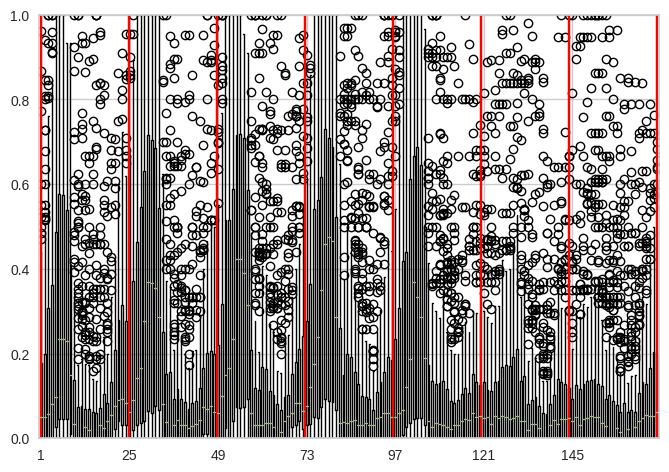

In [ ]:
#boxplot of loading score over the period time of stations on hill
plt.boxplot(loading_hill)
plt.xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
plt.vlines(x = np.linspace(1, loading_hill.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
plt.ylim(0,1)
plt.show()

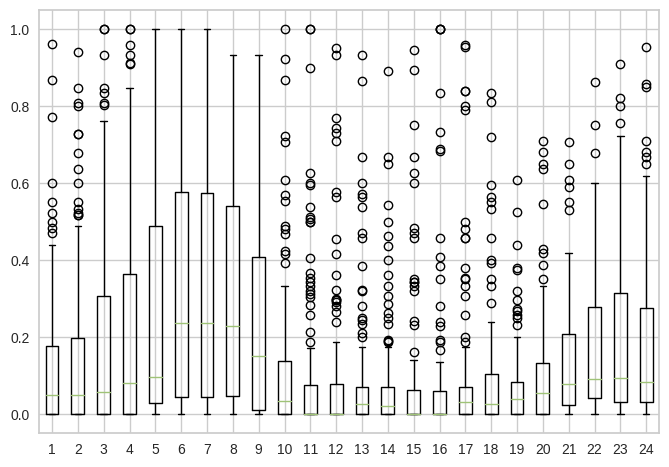

In [ ]:
#boxplot first 24 hours (monday) of stations on hills
plt.boxplot(loading_hill.iloc[:, :24])
plt.show()

**Interpretation**
loading score very low on Saturday and Sunday, possible explanation can be: people who play on Friday don't want to put the bikes back on the hills, so the stations are always short of bikes on Saturday and Sunday.

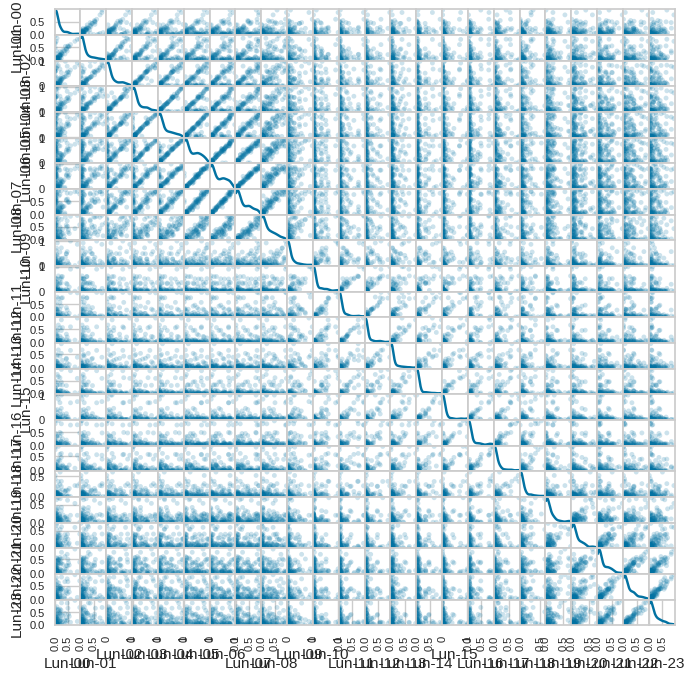

In [ ]:
#corrplot 24 first variables correponding to 24 hours of monday  
from pandas.plotting import scatter_matrix
scatter_matrix(loading_hill.iloc[:, :24],  alpha=0.2, 
               figsize=(8, 8), diagonal='kde')
plt.show()

**Interpretation**  
We see the slightly negative correlations between the loading scores in the afternoon and in the evening: which perhaps comes down to the fact that we are too tired and we no longer want to put the bikes back on the hills.

Text(0.5, 1.0, 'Average loading score(stations on hills)')

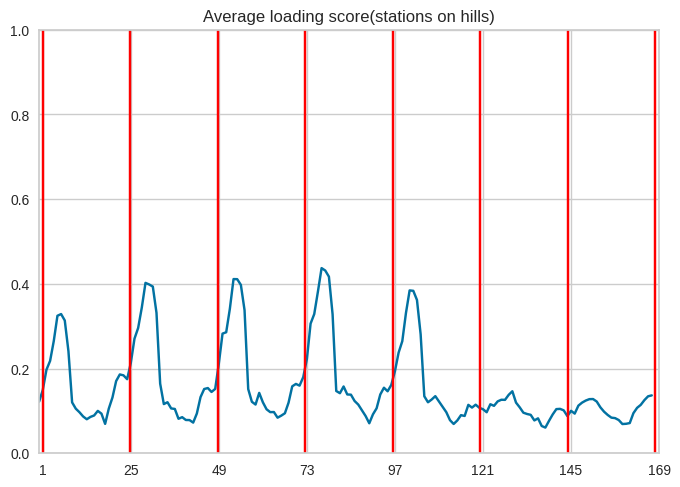

In [ ]:
#Average loading score(stations on hills)
plt.plot(np.array(loading_hill.mean()))
plt.ylim(0, 1)
plt.xlim(0, 169)
plt.xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
plt.vlines(x = np.linspace(1, loading_hill.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
plt.title("Average loading score(stations on hills)")

# 3. ANALYSIS BY PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

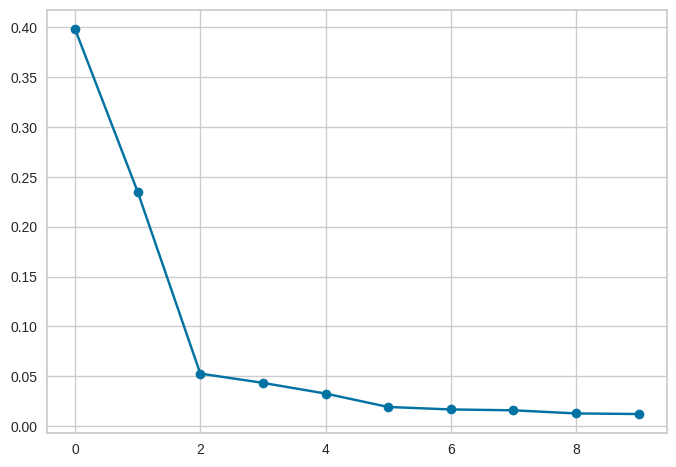

In [ ]:
loading_scaled = scale(loading_df)
pca = PCA()
##computing principal components
C = pca.fit(loading_scaled).transform(loading_scaled)
##explained variance of each principal components
plt.plot(pca.explained_variance_ratio_[:10],'o-')
plt.show()

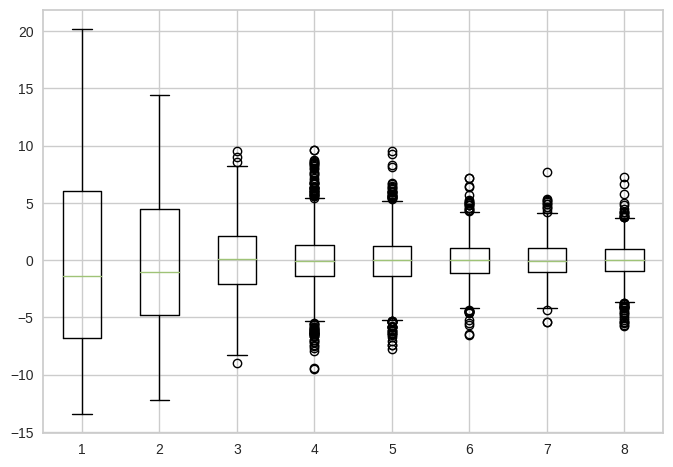

In [ ]:
#boxplots of coordiantes of first 8 components
plt.boxplot(C[:,0:8])
plt.show()

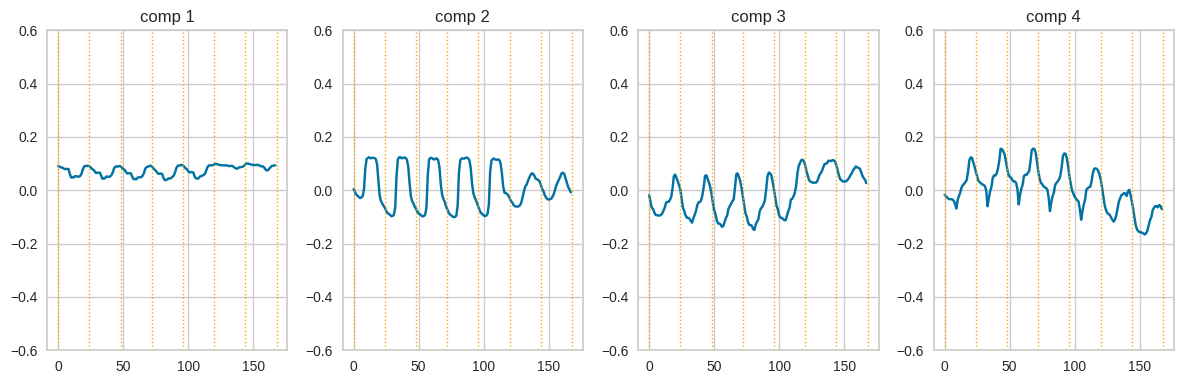

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(12, 4))

k = 0
lim = 0.6
for k in range(4):
    axes[k].plot(pca.components_[k])
    axes[k].set_title("comp "+ str(k+1))
#     axes[k].set_xlabel('hours')
#     axes[k].set_ylabel('loading')
    axes[k].set_ylim(-lim,lim)
    axes[k].vlines(x = np.linspace(0, 24*7, 8), ymin = -lim, ymax = lim
                   ,colors = "orange", 
                   linestyle = "dotted", linewidth = 1)
plt.tight_layout()
# plt.show()

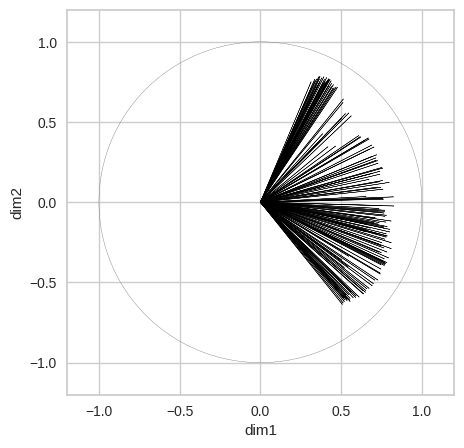

In [ ]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j in zip(coord1,coord2):
    #plt.text(i, j)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.add_patch(c)
plt.show()

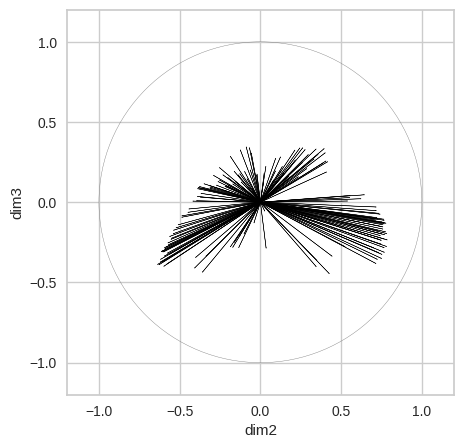

In [ ]:
## coordonnées et représentation des variables
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j in zip(coord2,coord3):
    #plt.text(i, j)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.set_xlabel('dim2')
ax.set_ylabel('dim3')
ax.add_patch(c)
plt.show()

In [ ]:
#graphe des individus par rapport aux differents PC principal components
var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" 
          for i in range(7)}
labels['color'] = 'Hill'

fig = px.scatter_matrix(
    C[:,:7],
    color=velibAdds.bonus,opacity=0.6*velibAdds.bonus+0.4,
    dimensions=range(7),
    labels=labels,
    title=f'Total Explained Variance: {var:.2f}%')
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30)
)
fig.update_traces(diagonal_visible=False)

# 4. CLUSTERING by Kmeans  

In [ ]:
def biPlot(scores, coords, labels_cluster, labels_hill):
    '''
    Inputs:
        scores: coordinates of the projected data
        coord: coordinates of the features, i.e. eigenvectors (PCs)
        labels: the class labels
    '''    
    xs = scores[:,0] # projection on PC1
    ys = scores[:,1] # projection on PC2
    n = coords.shape[0] # number of variables
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig,axs = plt.subplots(1,2,figsize=(13,8))
    
    axs[0].scatter(xs * scalex, ys * scaley, c = labels_cluster, s =3, alpha = 1)
    for i in range(n):
        # plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        axs[0].arrow(0, 0, coords[i,0], coords[i,1], color = 'k', alpha = 1, linestyle = '-', linewidth = 2, overhang=0.2)
        axs[0].text(coords[i,0]* 1.15, coords[i,1] * 1.15, str(i+1), color = 'seagreen', ha = 'center', va = 'center')
    axs[0].set_xlim(-1,1)
    axs[0].set_ylim(-1,1)
    axs[0].tick_params(axis='both', which='both') 
    axs[0].set_title('PCA - Biplot')
    axs[0].set_xlabel('Dim 1')
    axs[0].set_ylabel('Dim 2')
    axs[0].grid()
    
    axs[1].scatter(xs * scalex, ys * scaley, c = labels_hill, s =3, alpha = 1)
    axs[1].set_xlim(-1,1)
    axs[1].set_ylim(-1,1)
    axs[1].set_title('Individuals - PCA')        
    axs[1].set_xlabel('Dim 1')
    axs[1].set_ylabel('Dim 2')
    axs[1].grid()

In [ ]:
def elbow_and_silhouette(data):
    kmeans = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = KElbowVisualizer(kmeans, k=(2,10))

    visualizer.fit(data) 
    visualizer.show() 

## 4.1. Kmeans on full data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
K = 6
clust_km_full = KMeans(n_clusters = K, random_state=0).fit_predict(loading_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



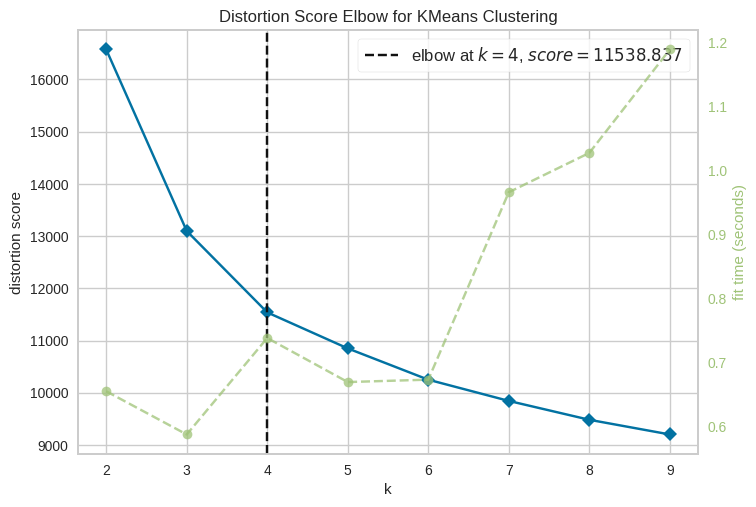

In [ ]:
elbow_and_silhouette(loading_matrix)

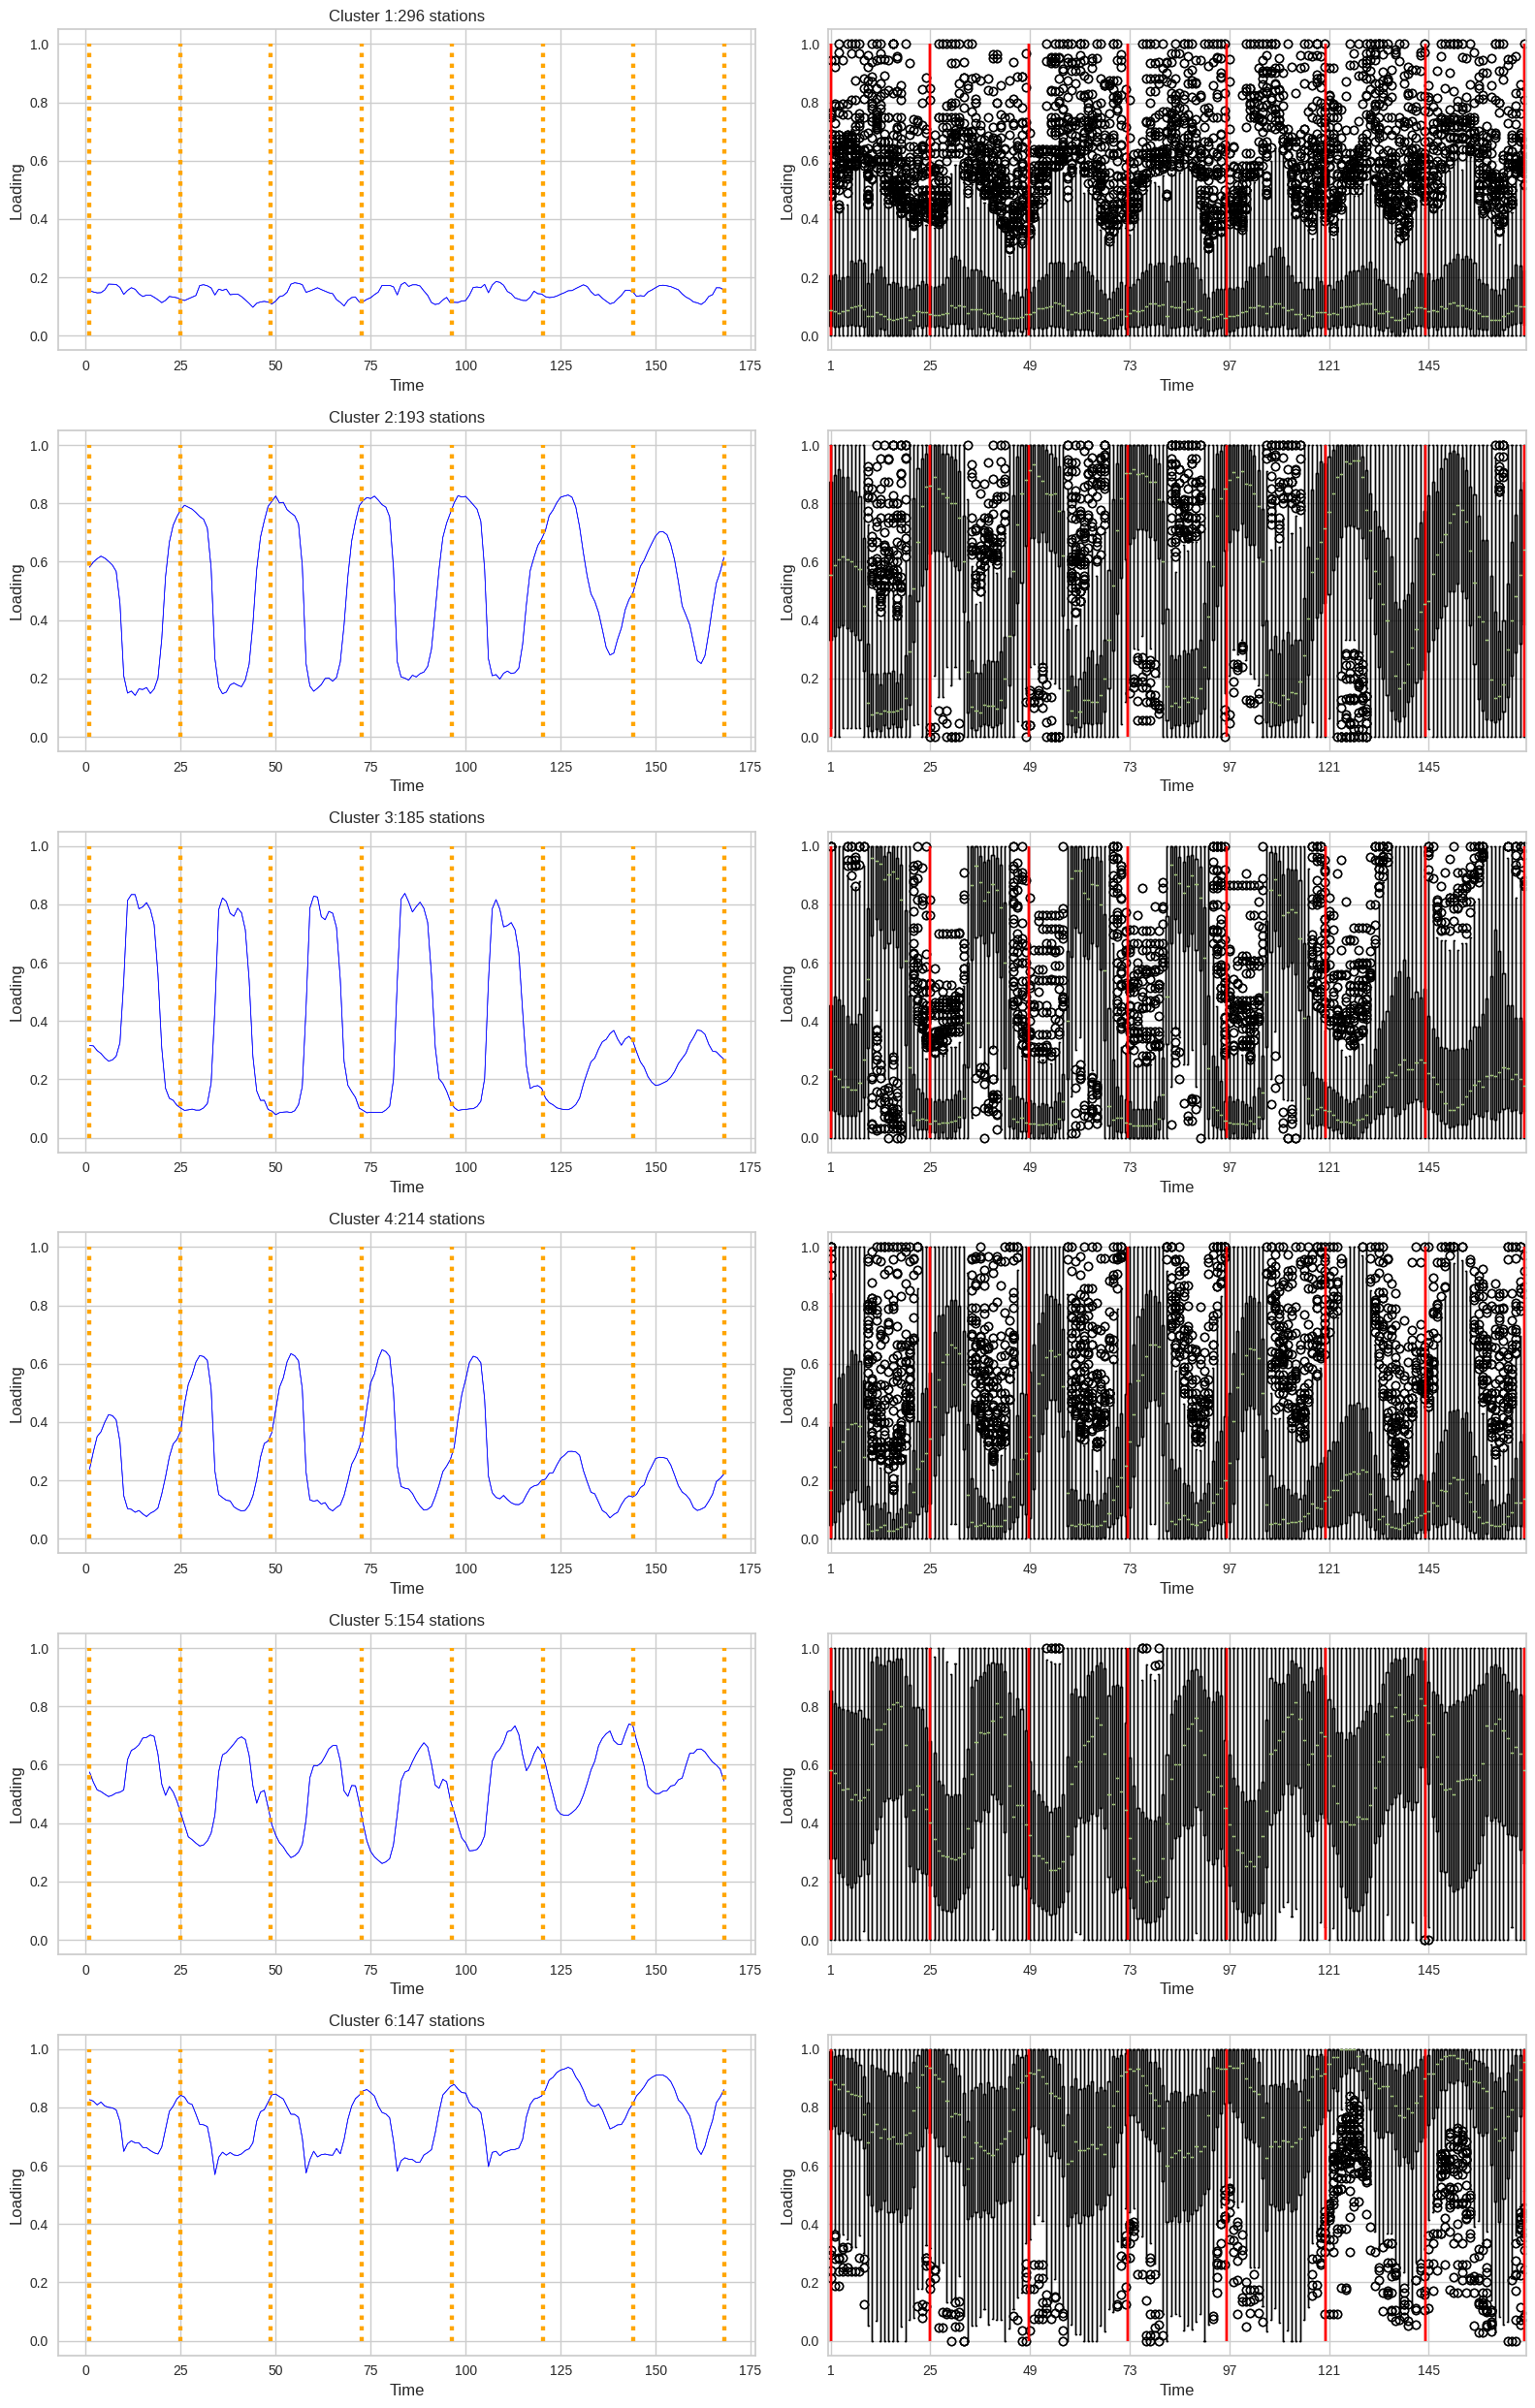

In [ ]:
n_steps = loading_df.shape[1]
time    = np.linspace(1, n_steps, n_steps)

fig, axs = plt.subplots(K, 2, figsize = (16,25))
for i in range(K):
    for j in range(2):
        load_clust_i = np.squeeze(loading_matrix[np.where(clust_km_full==i),:168])
        avg_hourly = np.mean(load_clust_i,axis=0)
        axs[i, 0].plot(time, avg_hourly, linewidth = 0.5, color = 'blue')
        axs[i, 0].set_title('Cluster '+str(i+1)+':'+str(np.shape(load_clust_i)[0])+' stations', fontsize = 12)
        axs[i, 0].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)
        
        axs[i, 1].boxplot(load_clust_i)
        axs[i, 1].set_xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
        axs[i, 1].vlines(x = np.linspace(1, loading_df.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
        
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

## 4.2. Kmeans on PCA

In [ ]:
clust_km_pca = KMeans(n_clusters = K, random_state=0).fit_predict(C[:,:4])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



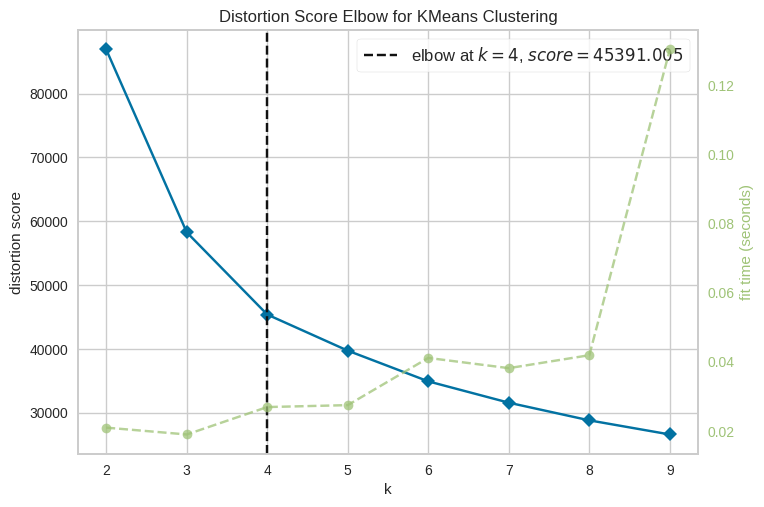

In [ ]:
elbow_and_silhouette(C[:,:4])

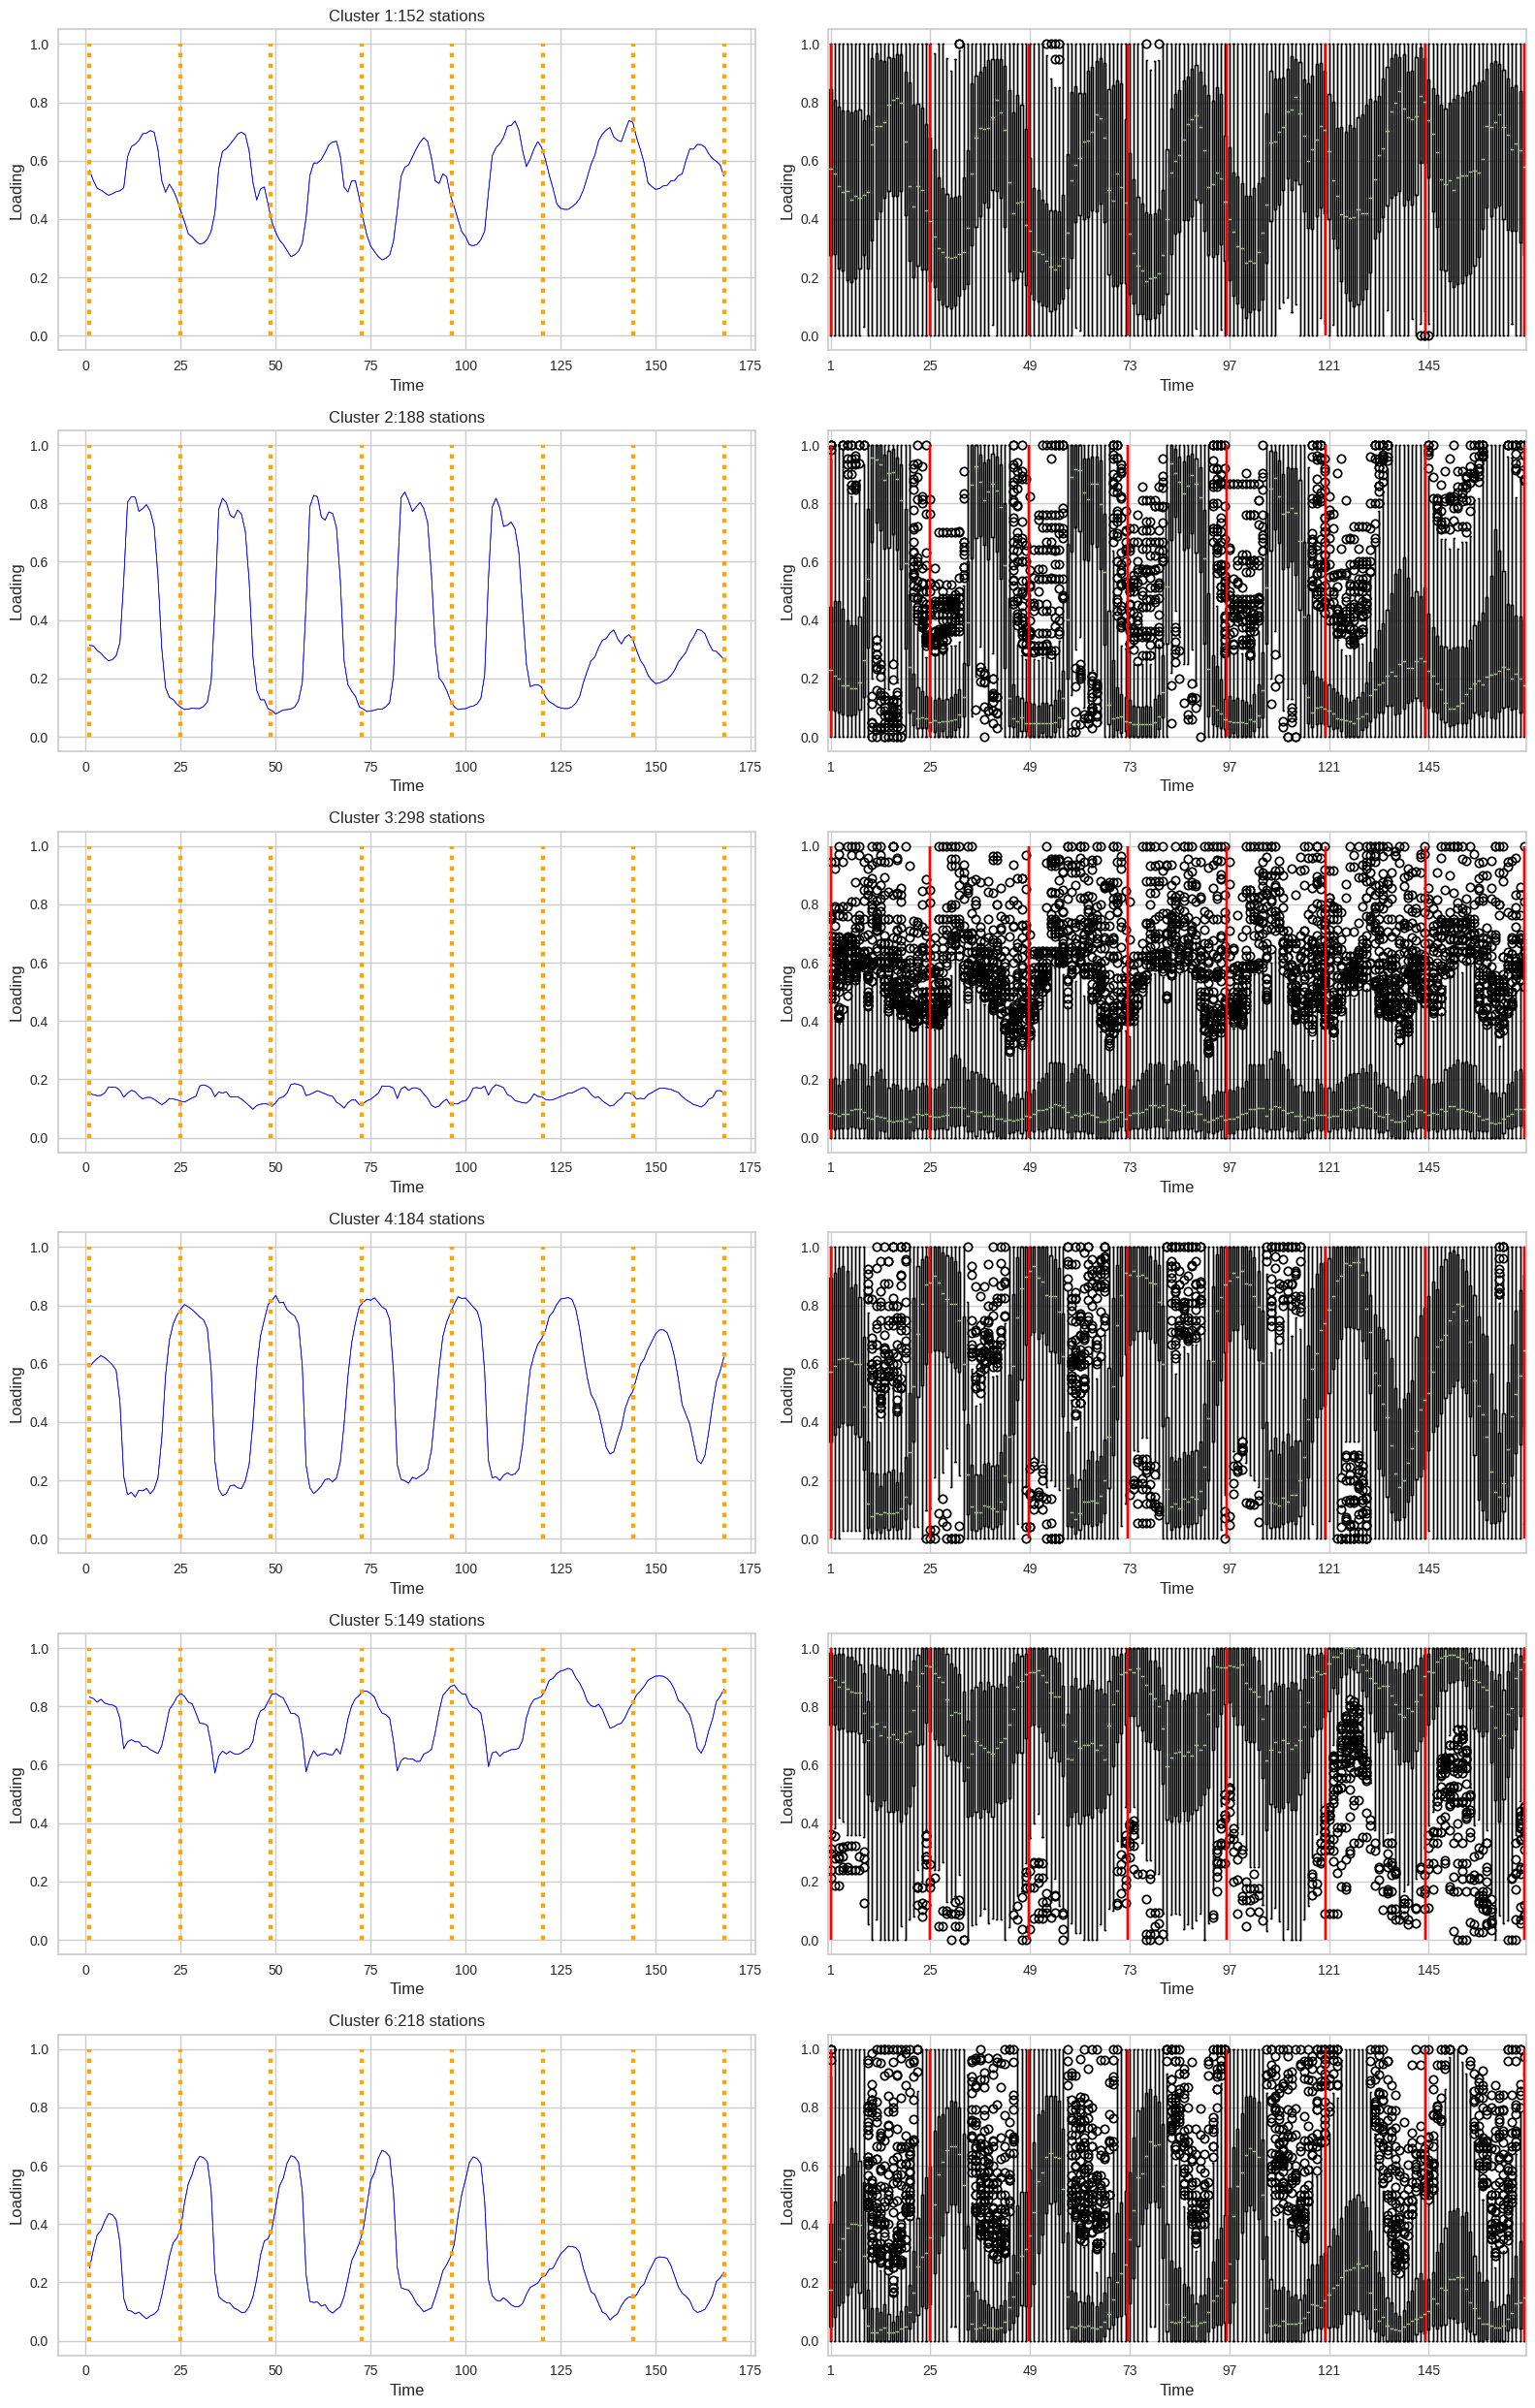

In [ ]:
n_steps = loading_df.shape[1]
time    = np.linspace(1, n_steps, n_steps)

fig, axs = plt.subplots(K, 2, figsize = (16,25))
for i in range(K):
    for j in range(2):
        load_clust_i = np.squeeze(loading_matrix[np.where(clust_km_pca==i),:168])
        avg_hourly = np.mean(load_clust_i,axis=0)
        axs[i, 0].plot(time, avg_hourly, linewidth = 0.5, color = 'blue')
        axs[i, 0].set_title('Cluster '+str(i+1)+':'+str(np.shape(load_clust_i)[0])+' stations', fontsize = 12)
        axs[i, 0].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)
        
        axs[i, 1].boxplot(load_clust_i)
        axs[i, 1].set_xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
        axs[i, 1].vlines(x = np.linspace(1, loading_df.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
        
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

# 5. CLUSTERING by Agglomerative Hierarchical Clustering


## 5.1. AHC on full data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

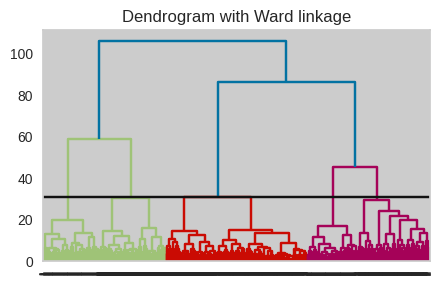

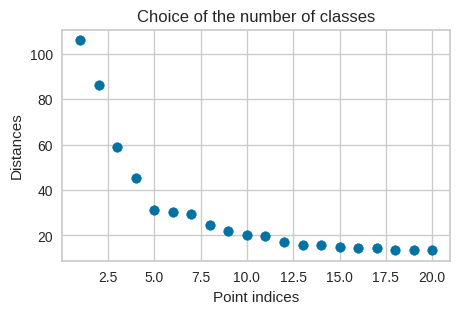

In [ ]:
K = 6
ac_full = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage="ward")
clust_ac_full = ac_full.fit_predict(loading_matrix)

children = ac_full.children_
distances = ac_full.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

plt.figure(figsize=(5,3))
sch.dendrogram(linkage_matrix, labels=ac_full.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac_full.distances_[-K]+ac_full.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")

n_sizes = 20
x = np.arange(n_sizes, 0, -1)
y = ac_full.distances_[-n_sizes:]
plt.figure(figsize=(5,3))
plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

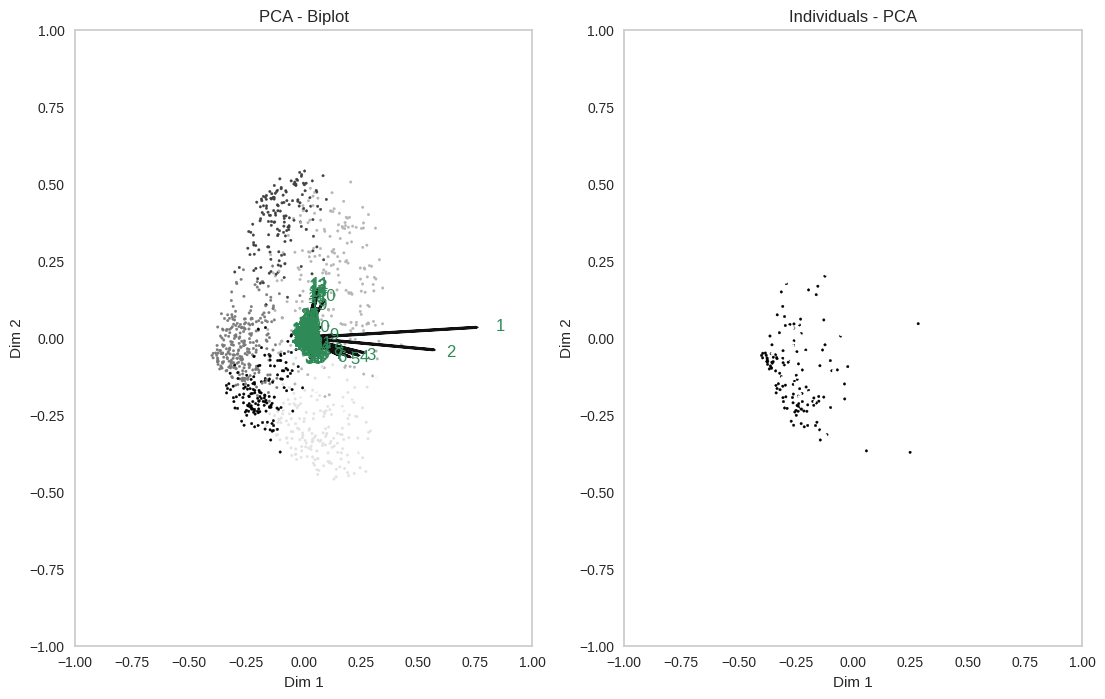

In [ ]:
coords = pca.components_.transpose()*np.sqrt(pca.explained_variance_).reshape(-1,1)
biPlot(C ,coords, clust_ac_full, velibAdds.bonus.to_numpy())

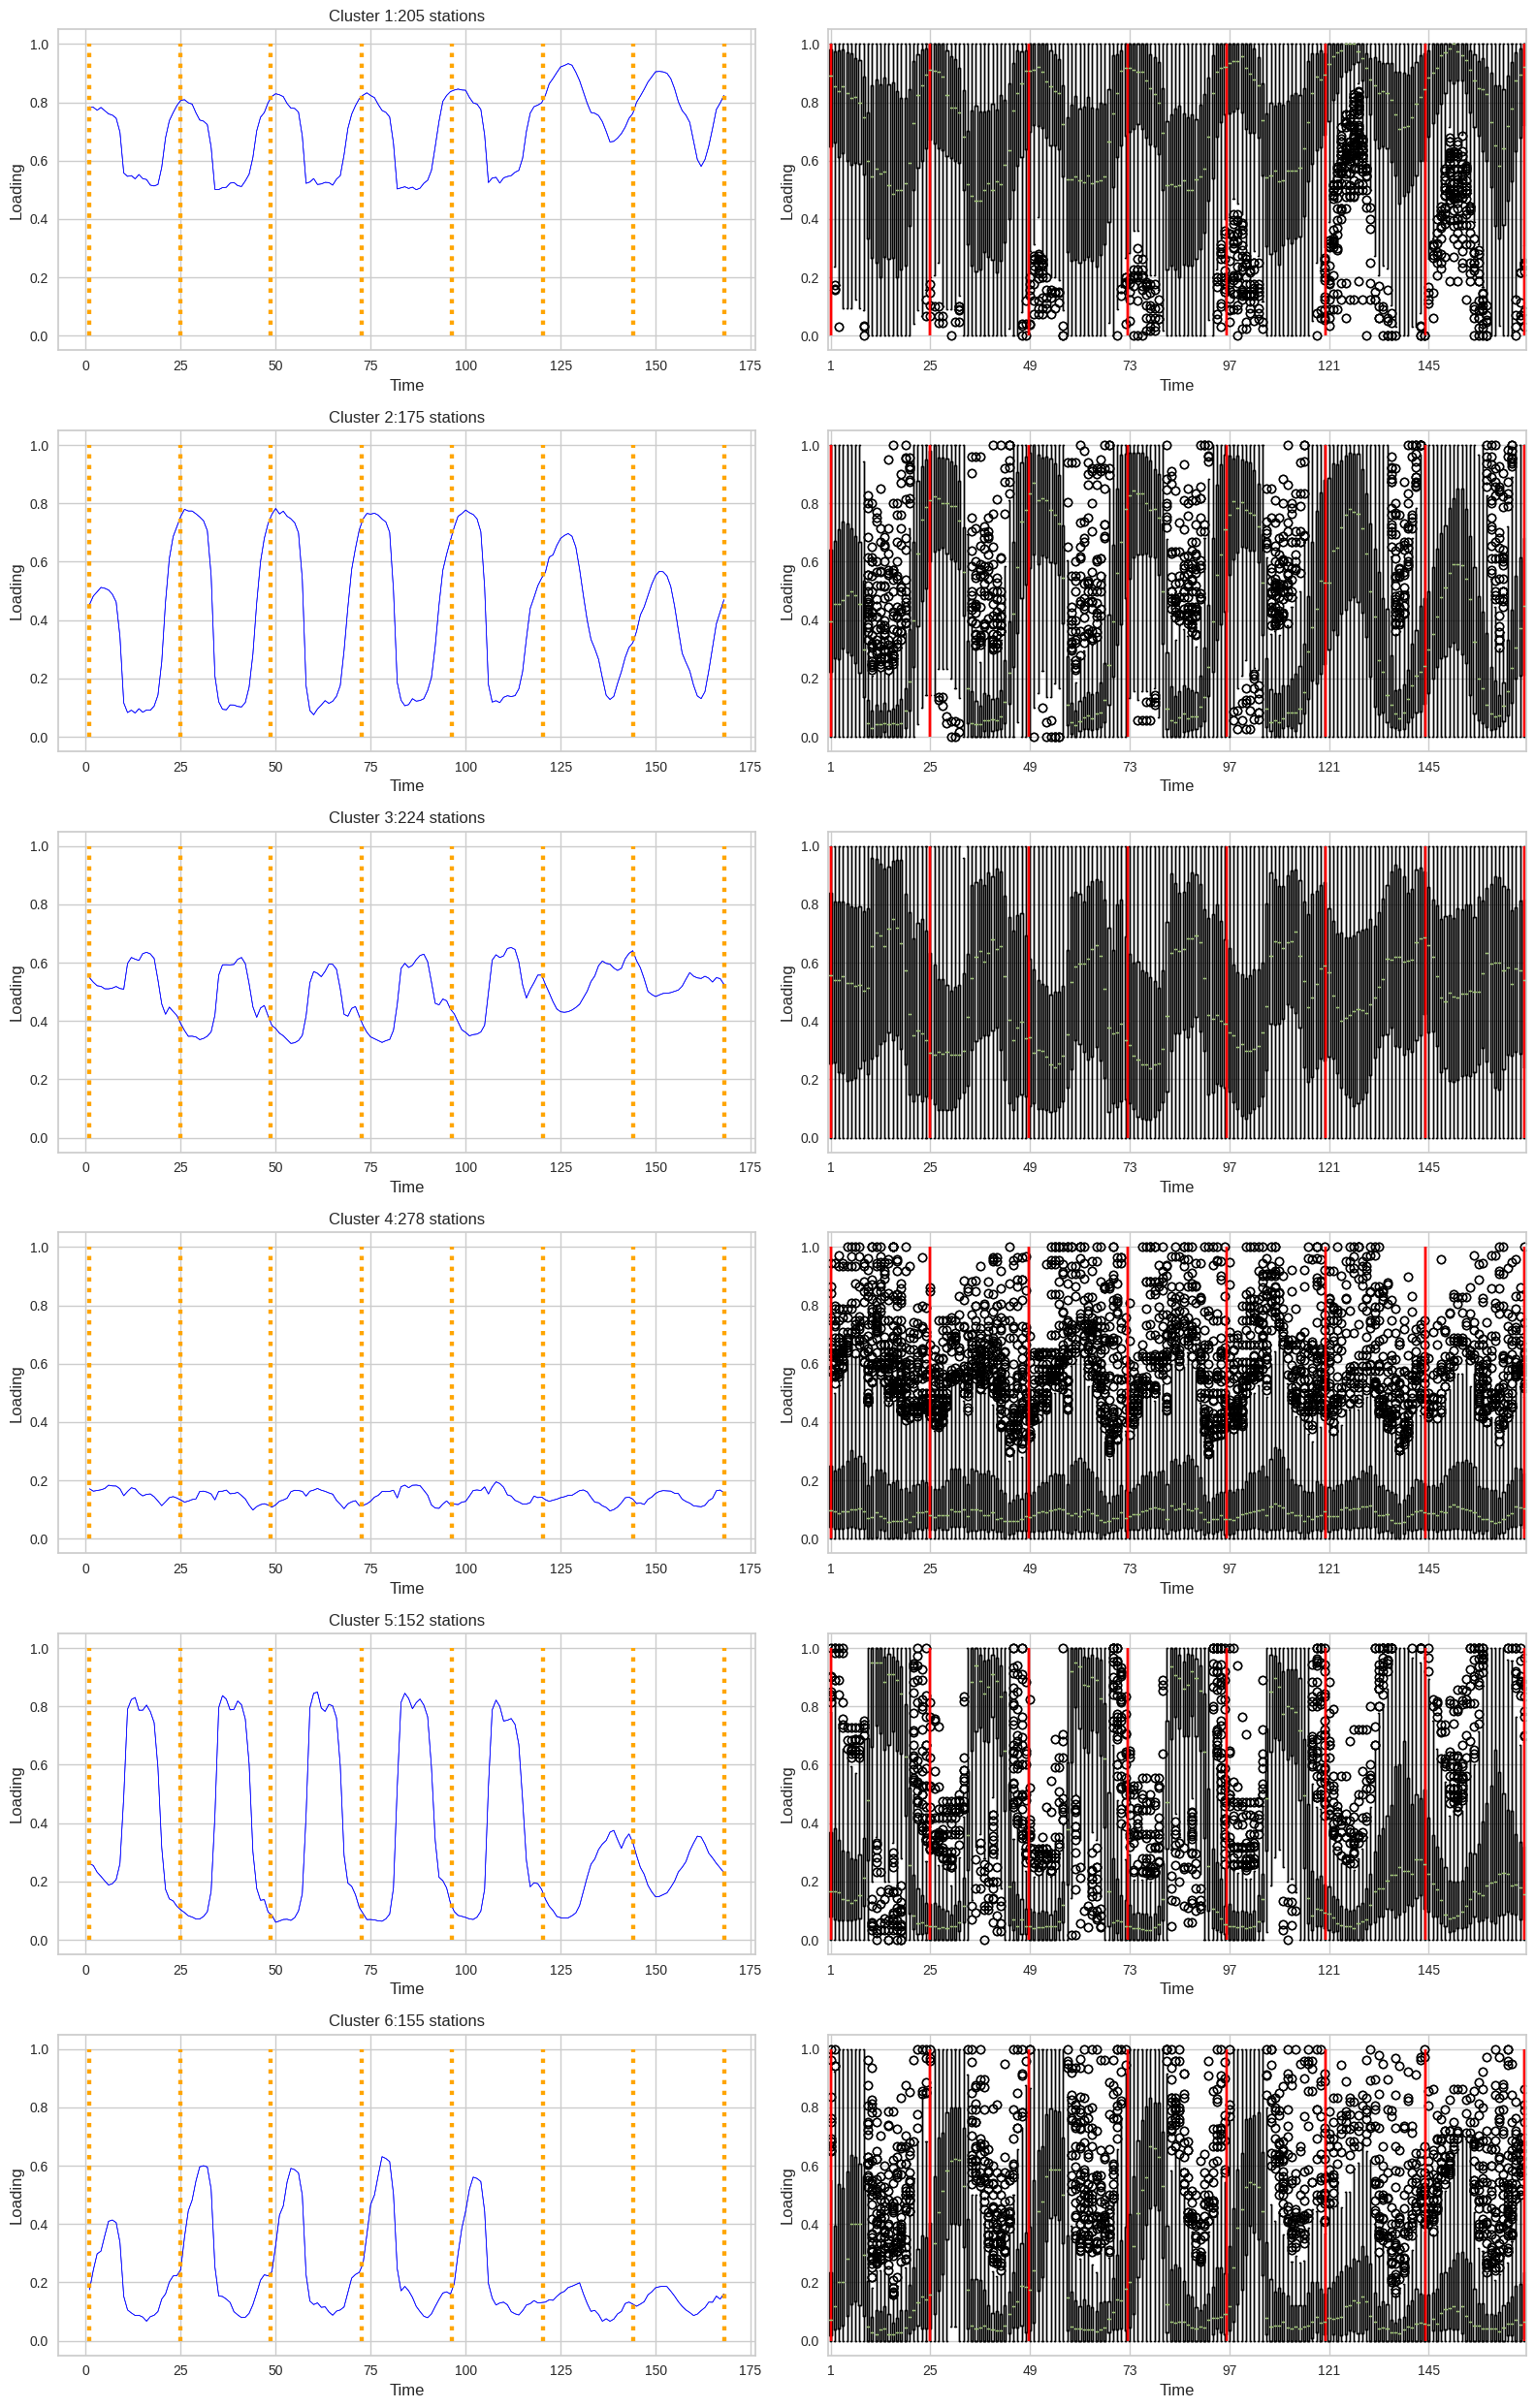

In [ ]:
n_steps = loading_df.shape[1]
time    = np.linspace(1, n_steps, n_steps)

fig, axs = plt.subplots(K, 2, figsize = (16,25))
for i in range(K):
    for j in range(2):
        load_clust_i = np.squeeze(loading_matrix[np.where(clust_ac_full==i),:168])
        avg_hourly = np.mean(load_clust_i,axis=0)
        axs[i, 0].plot(time, avg_hourly, linewidth = 0.5, color = 'blue')
        axs[i, 0].set_title('Cluster '+str(i+1)+':'+str(np.shape(load_clust_i)[0])+' stations', fontsize = 12)
        axs[i, 0].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)
        
        axs[i, 1].boxplot(load_clust_i)
        axs[i, 1].set_xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
        axs[i, 1].vlines(x = np.linspace(1, loading_df.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
        
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

## 5.2. AHC on PCA

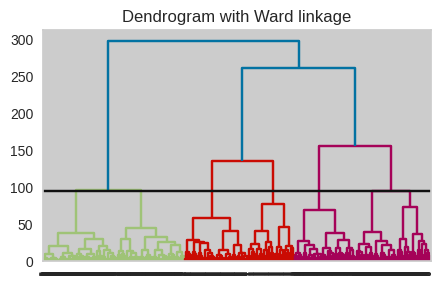

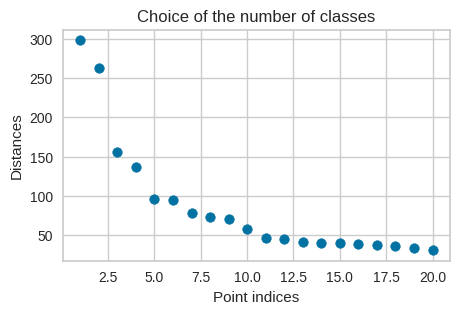

In [ ]:
K = 6
ac_pca = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage="ward")
clust_ac_pca = ac_pca.fit_predict(C[:,:4])

children = ac_pca.children_
distances = ac_pca.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

plt.figure(figsize=(5,3))
sch.dendrogram(linkage_matrix, labels=ac_pca.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac_pca.distances_[-K]+ac_pca.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")

n_sizes = 20
x = np.arange(n_sizes, 0, -1)
y = ac_pca.distances_[-n_sizes:]
plt.figure(figsize=(5,3))
plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

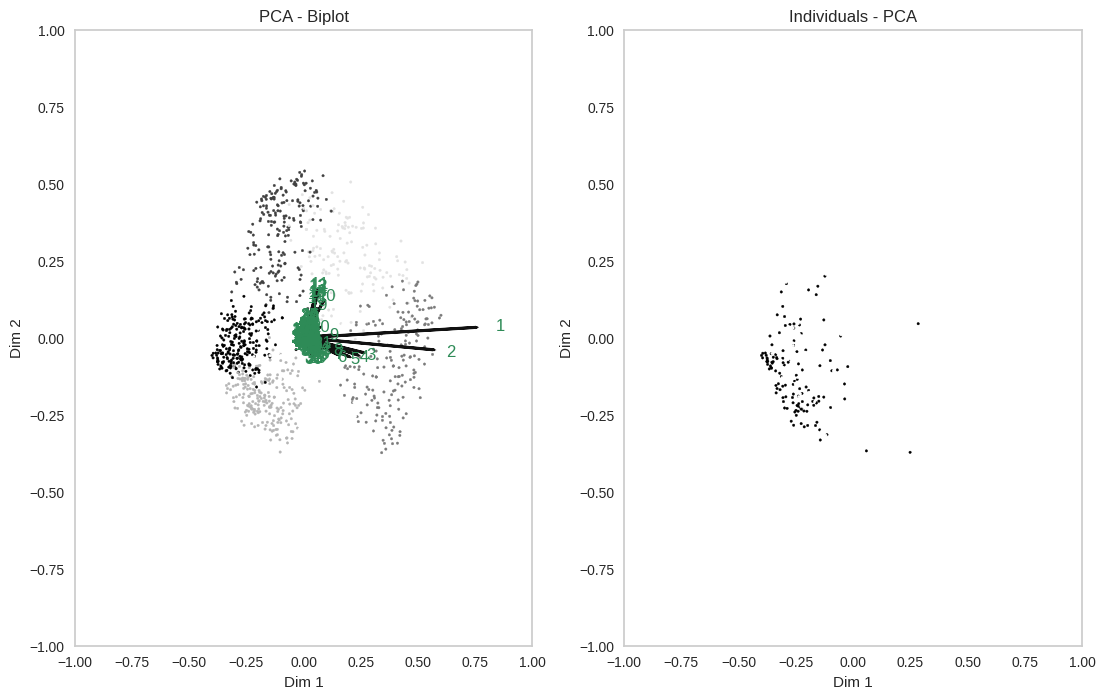

In [ ]:
coords = pca.components_.transpose()*np.sqrt(pca.explained_variance_).reshape(-1,1)
biPlot(C ,coords,clust_ac_pca,velibAdds.bonus.to_numpy())
plt.show()

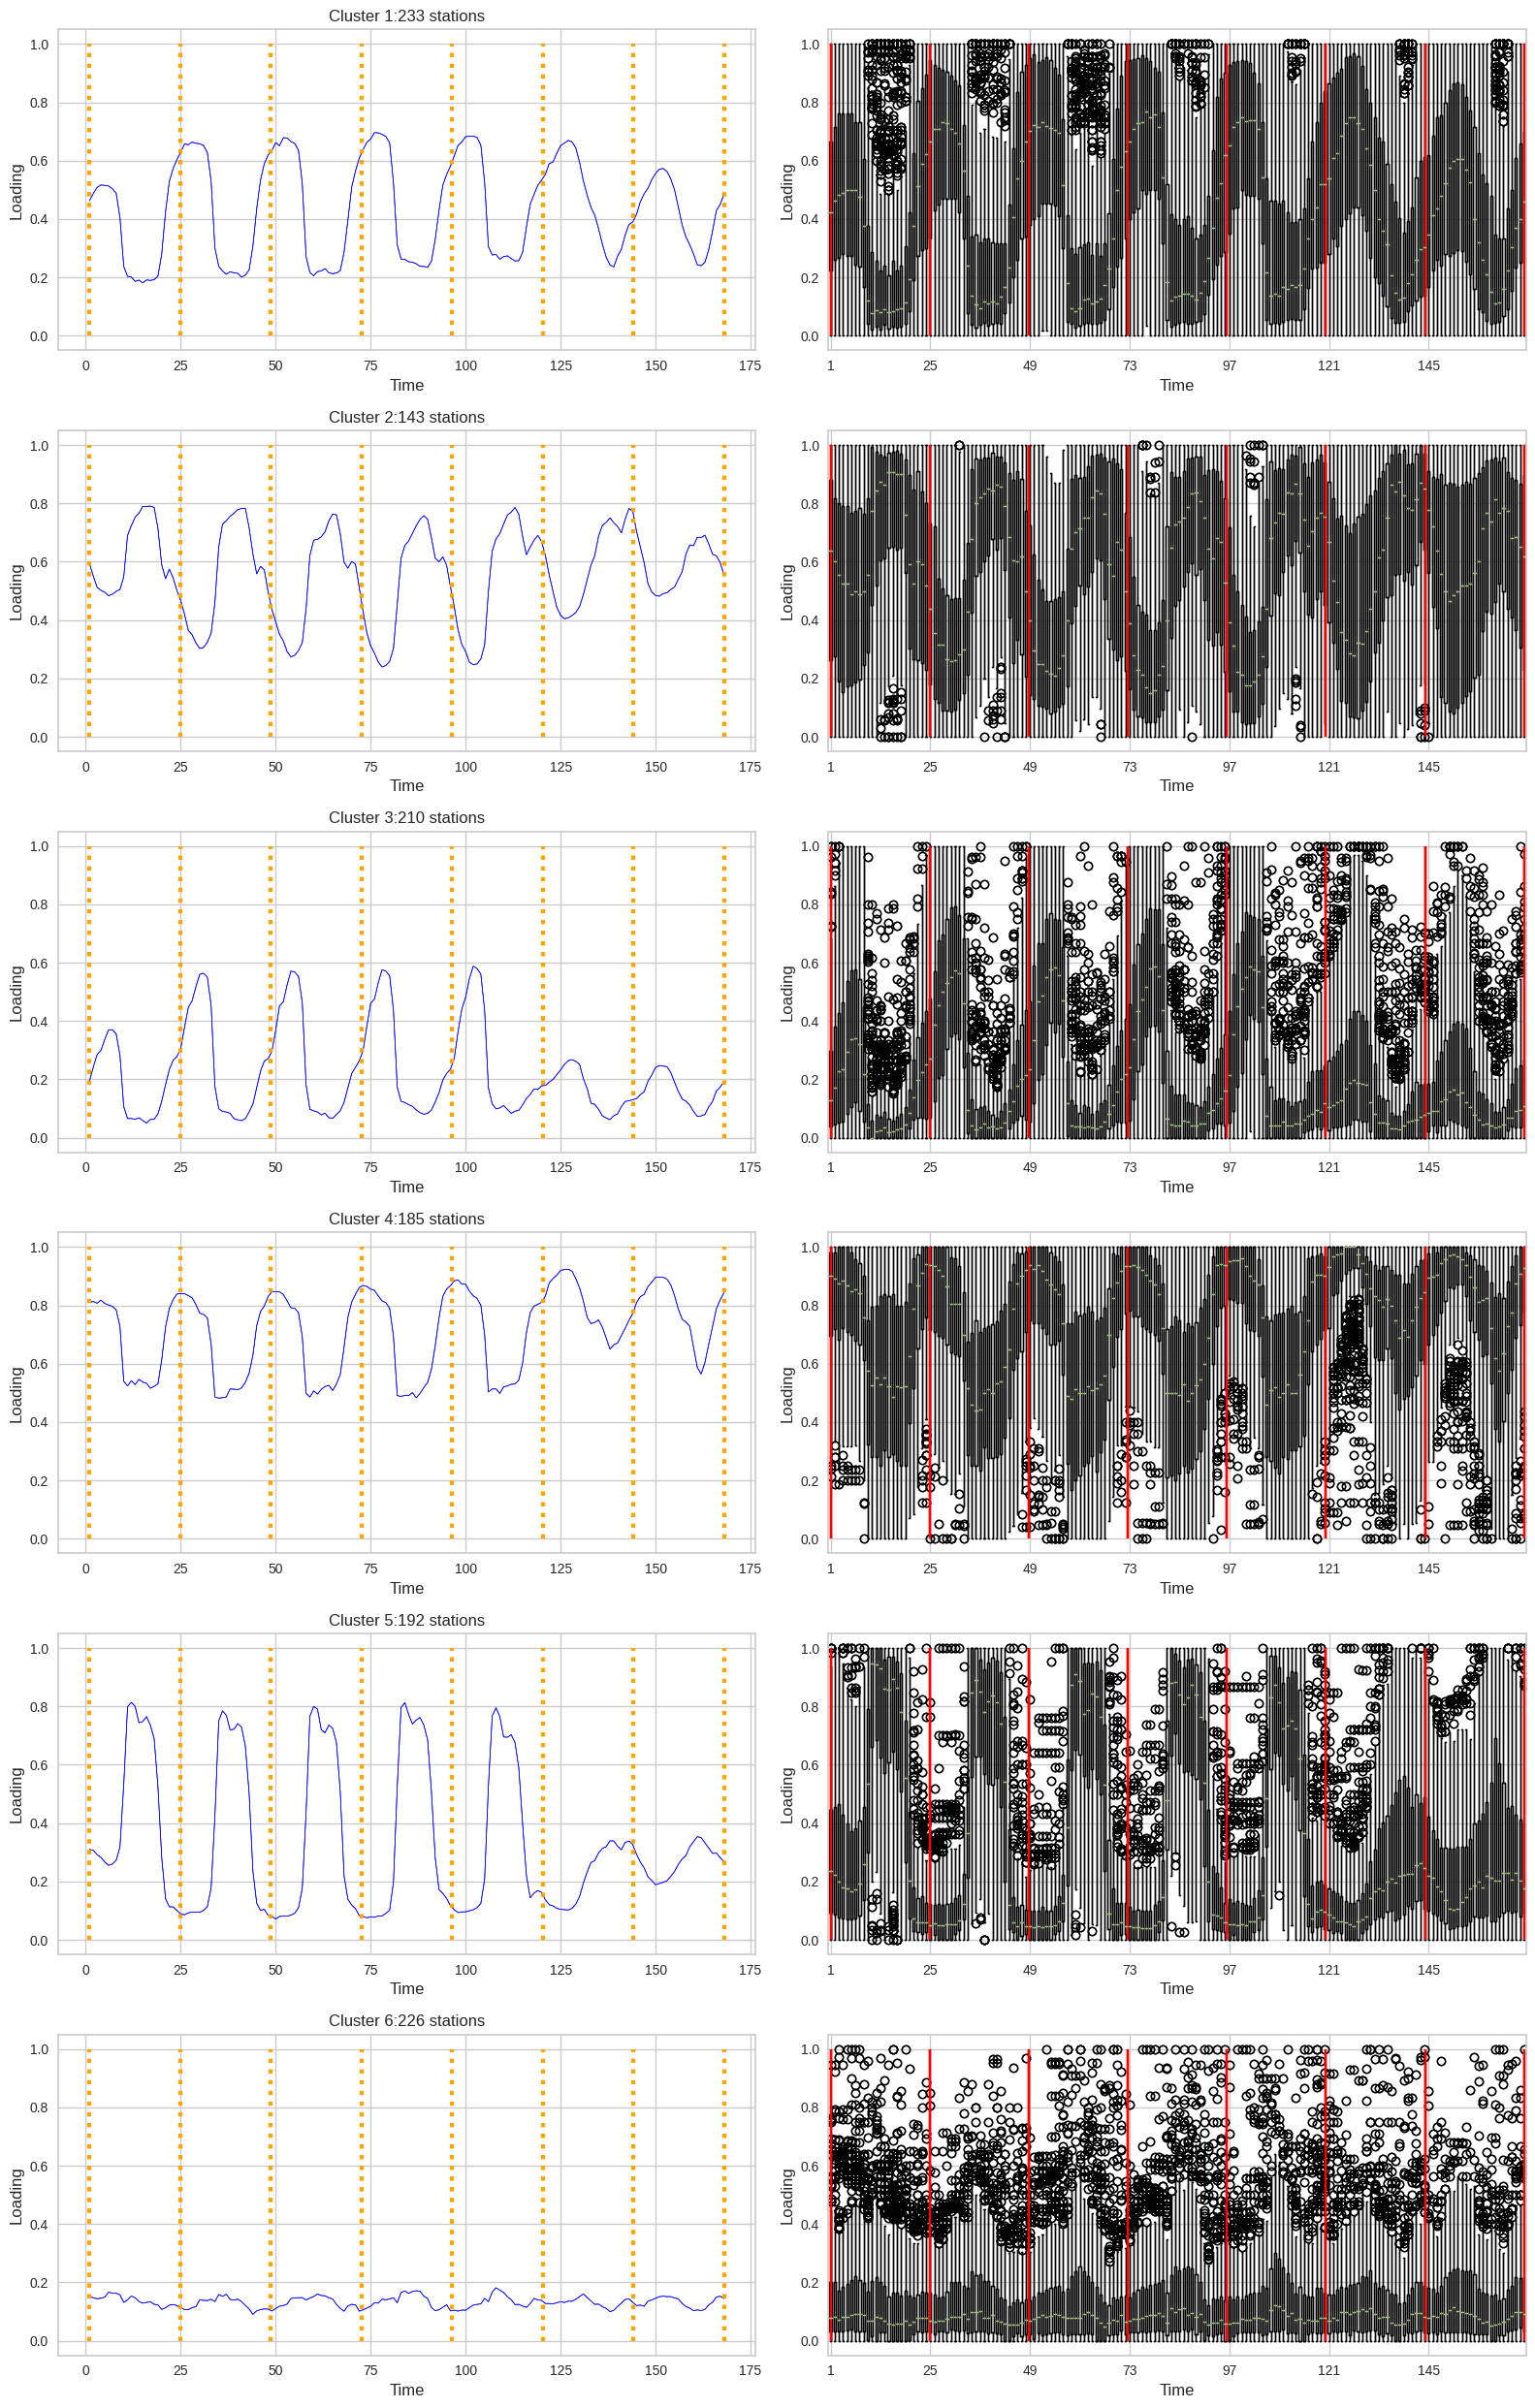

In [ ]:
n_steps = loading_df.shape[1]
time    = np.linspace(1, n_steps, n_steps)

fig, axs = plt.subplots(K, 2, figsize = (16,25))
for i in range(K):
    for j in range(2):
        load_clust_i = np.squeeze(loading_matrix[np.where(clust_ac_pca==i),:168])
        avg_hourly = np.mean(load_clust_i,axis=0)
        axs[i, 0].plot(time, avg_hourly, linewidth = 0.5, color = 'blue')
        axs[i, 0].set_title('Cluster '+str(i+1)+':'+str(np.shape(load_clust_i)[0])+' stations', fontsize = 12)
        axs[i, 0].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)
        
        axs[i, 1].boxplot(load_clust_i)
        axs[i, 1].set_xticks(np.arange(1, 168+24, 24), labels = np.arange(1, 168+24, 24))
        axs[i, 1].vlines(x = np.linspace(1, loading_df.columns.size, 8), ymin = 0, ymax = 1, colors = "red")
        
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

# 6. CLUSTERING by Gaussian Mixture Models

In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [ ]:
num_cluster = 7
gmm = GaussianMixture(n_components=num_cluster)
cluster_gmm_pca = gmm.fit_predict(C)
probas_gmm_pca = gmm.predict_proba(C)
loading = np.array(loading_df)

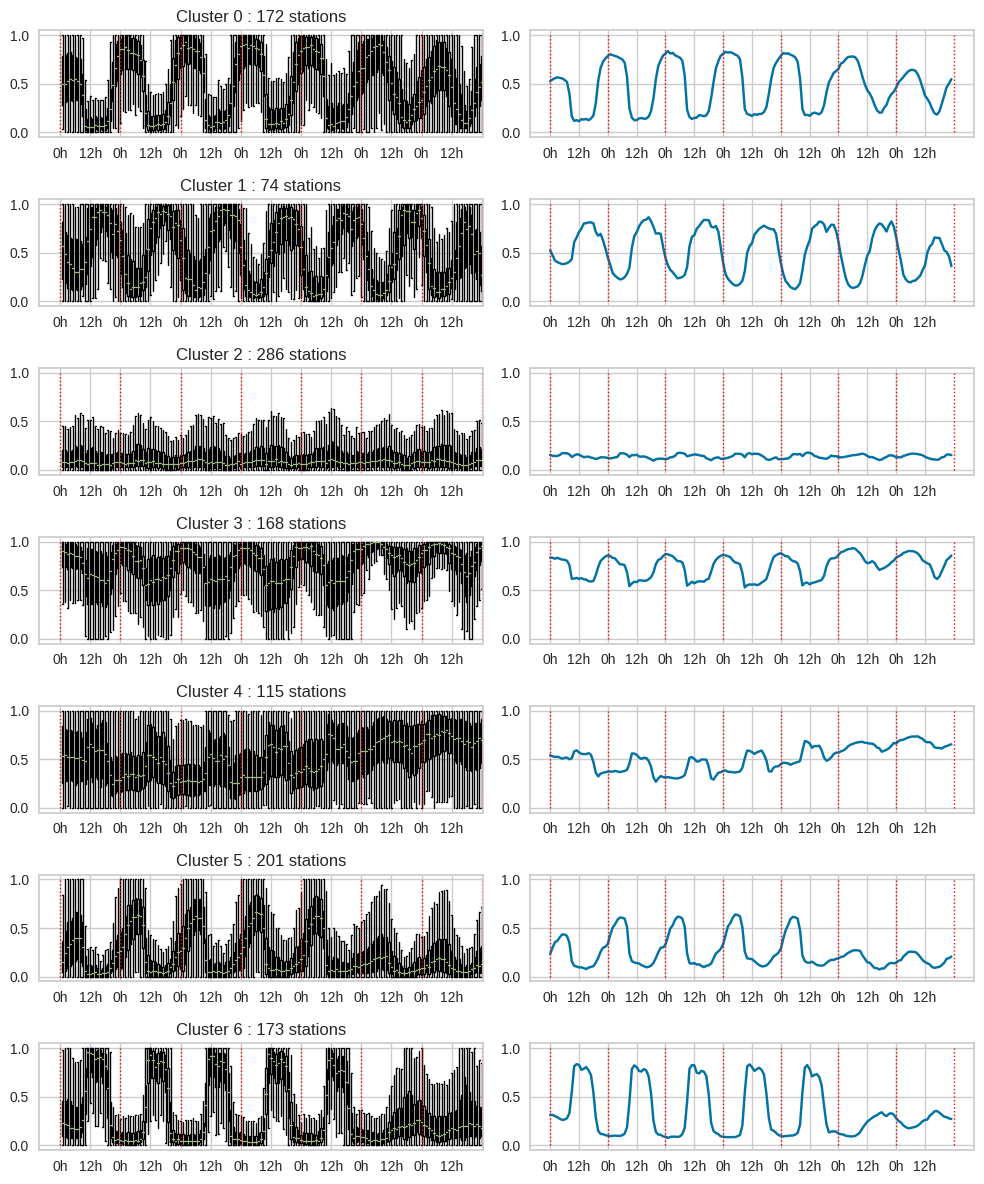

In [ ]:
fig, axes = plt.subplots(num_cluster,2, figsize=(10, 12))

for k in range(num_cluster):
    axes[k,0].boxplot(loading[np.where(cluster_gmm_pca==k)[0], :], showfliers=False)
    time = (np.arange(0,168,12)%24)
    labels = [str(t)+'h' for t in time]
    axes[k,0].set_xticks(np.arange(0,168,12))
    axes[k,0].set_xticklabels(labels)

    axes[k,0].vlines(x = np.linspace(0, 24*7, 8) ,ymin = 0, ymax = 1,
                   colors = "red", linestyle = "dotted", linewidth = 1)
    axes[k,0].set_title("Cluster {} : {} stations".format(k, len(np.where(cluster_gmm_pca==k)[0])))
    
    axes[k,1].plot(np.mean(loading[np.where(cluster_gmm_pca==k)[0], :], axis=0))
    axes[k,1].set_xticks(np.arange(0,168,12))
    axes[k,1].set_xticklabels(labels)

    axes[k,1].vlines(x = np.linspace(0, 24*7, 8) ,ymin = 0, ymax = 1,
                   colors = "red", linestyle = "dotted", linewidth = 1)
    
    plt.tight_layout()

# 7. Comparaison of Different Methodes 

In [ ]:
from mca import MCA

In [ ]:
list_clu = list(zip(clust_ac_pca, cluster_gmm_pca))
clu_tab=pd.DataFrame(list_clu, columns = ['AHC','GMM'])
# clu_tab=clu_tab.astype('category')

clu_tab["AHC"]=pd.Categorical(clu_tab["AHC"],ordered=False)
clu_tab["GMM"]=pd.Categorical(clu_tab["GMM"],ordered=False)
clu_tab=pd.DataFrame(pd.get_dummies(clu_tab[['AHC','GMM']]))

clu_tab.head()

AHC_0  AHC_1  AHC_2  AHC_3  AHC_4  AHC_5  GMM_0  GMM_1  GMM_2  GMM_3  \
0      0      0      1      0      0      0      0      0      0      0   
1      1      0      0      0      0      0      1      0      0      0   
2      0      1      0      0      0      0      0      1      0      0   
3      0      1      0      0      0      0      0      0      0      0   
4      0      1      0      0      0      0      0      1      0      0   

   GMM_4  GMM_5  GMM_6  
0      0      1      0  
1      0      0      0  
2      0      0      0  
3      0      0      1  
4      0      0      0

In [ ]:
clu_tab.dtypes

AHC_0    uint8
AHC_1    uint8
AHC_2    uint8
AHC_3    uint8
AHC_4    uint8
AHC_5    uint8
GMM_0    uint8
GMM_1    uint8
GMM_2    uint8
GMM_3    uint8
GMM_4    uint8
GMM_5    uint8
GMM_6    uint8
dtype: object

In [ ]:
mca=MCA(clu_tab,benzecri=False)
# Valeurs singulières
print(mca.L)

[0.96325027 0.945928   0.88610082 0.85741671 0.82316805 0.5
 0.17683195 0.14258329 0.11389918 0.054072   0.03674973]


In [ ]:
# Composantes principales des colonnes (modalités)
print(mca.fs_c())

[[ 4.22214168e-01 -4.88538953e-01  7.60480970e-01 -2.01658966e-01
   1.56241045e+00 -3.44235875e-15]
 [ 1.02525710e+00  1.56931167e-01 -2.85035269e-02 -2.08340756e+00
  -9.66196632e-01 -6.92860444e-15]
 [-9.36557886e-01 -6.05999721e-01  1.30013187e+00  4.30589726e-01
  -1.00999031e+00  9.45410054e-16]
 [ 1.32259989e+00 -8.07580327e-01 -9.56669264e-01  1.17719013e+00
  -4.73592196e-01  5.02603944e-15]
 [ 1.21620843e-01  2.11789833e+00  1.45138425e-01  5.93373816e-01
   2.92442632e-02  3.48033501e-15]
 [-1.39974642e+00 -1.70733443e-01 -1.31427663e+00 -3.41672432e-01
   3.01867732e-01 -3.42781374e-17]
 [ 5.93981166e-01 -6.10389508e-01  6.22083586e-01  5.85437080e-02
   1.81680009e+00 -8.37906195e-01]
 [ 1.01871506e+00  3.44456879e-01 -4.87242823e-03 -2.57534434e+00
  -1.31713956e+00 -2.00546030e+00]
 [-1.30373243e+00 -1.45752783e-01 -1.04896011e+00 -2.53591343e-01
   2.09981924e-01 -2.04395060e-04]
 [ 1.37578269e+00 -7.83245995e-01 -1.07039339e+00  1.12364371e+00
  -7.58141243e-01  6.8690

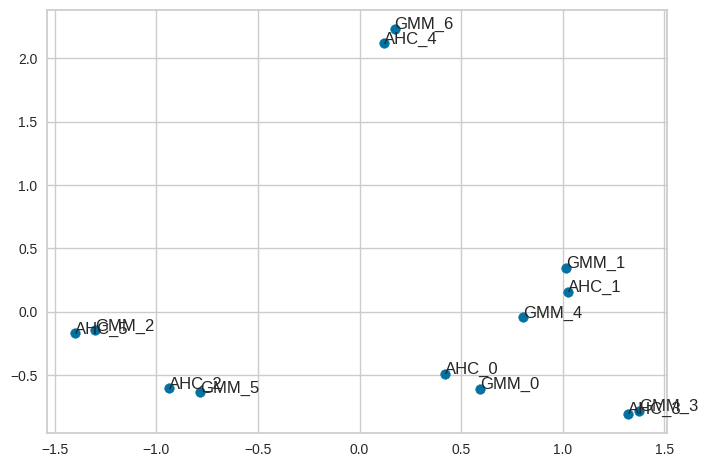

In [ ]:
# Premier plan principal
# col=[1,1,1,1,1,1,2,2,2,2,2,2,2]
plt.scatter(mca.fs_c()[:, 0],mca.fs_c()[:, 1])
for i, j, nom in zip(mca.fs_c()[:, 0],mca.fs_c()[:, 1], clu_tab.columns):
       plt.text(i, j, nom)
plt.show()